In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

- 0: Inhibition
- 1: Clustering
- 2: Independent

In [2]:
X = np.load("./data/jfunction_data_med_pred.npy").squeeze()
y = np.load("./data/jfunction_data_med_target.npy")
filter_mask = np.load("./data/jfunction_data_med_filter.npy")
print(X.shape, y.shape, filter_mask.shape)

(23140, 180) (23140, 1) (23140,)


In [3]:
class_names = ["Inhibition", "Clustering", "Independent"]

# Clustering (no filter)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


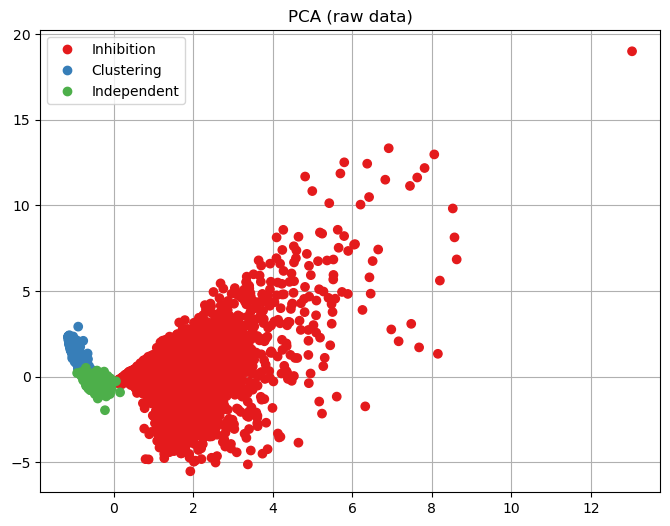

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
pca_model = PCA(n_components=2, whiten=True)
X_pca = pca_model.fit_transform(X)
ax_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Set1", vmin=0, vmax=9, zorder=3)
ax.grid()
ax.legend(handles=ax_scatter.legend_elements()[0], labels=class_names)
ax.set(title="PCA (raw data)")
plt.savefig("figures/PCA_raw_data.eps")
plt.savefig("figures/PCA_raw_data.png")
plt.show()

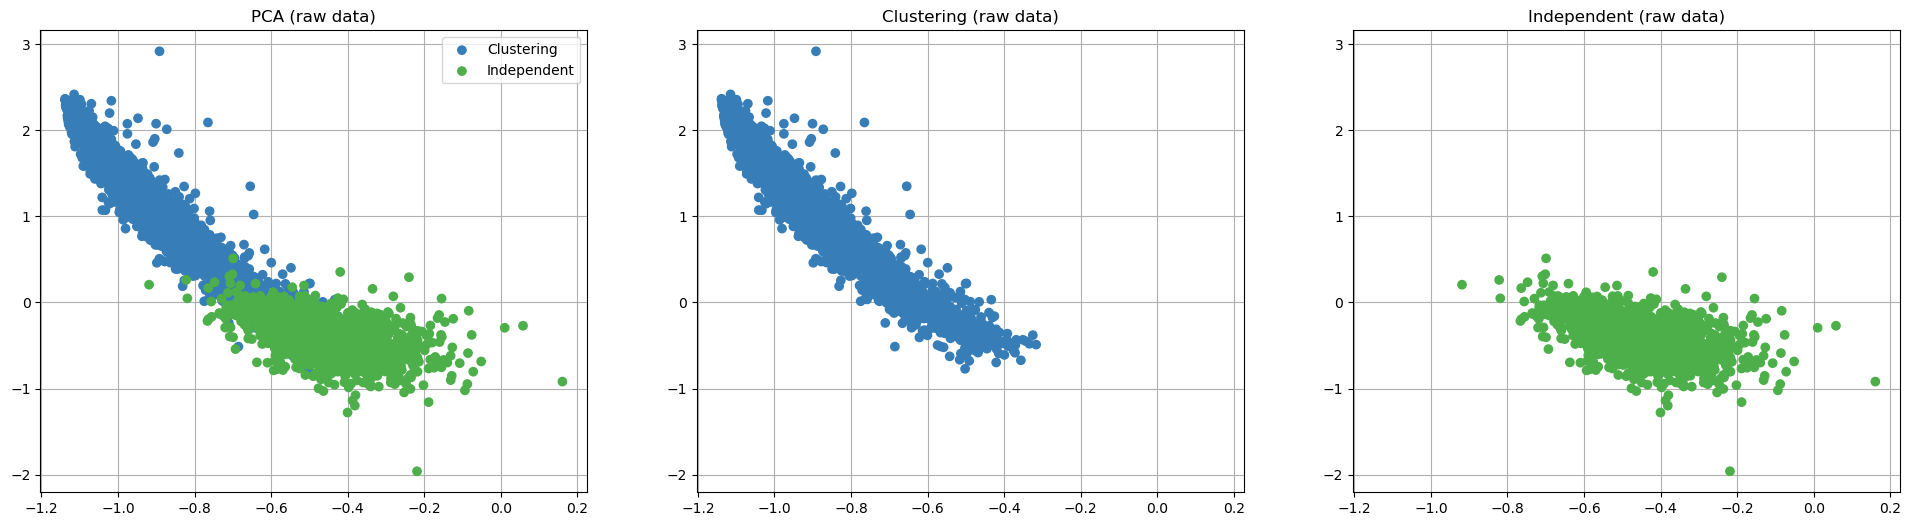

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(8*3, 6))
axes[0].scatter(X_pca[y[:, 0] == 1, 0], X_pca[y[:, 0] == 1, 1], c=y[y[:, 0] == 1], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Clustering")
axes[0].scatter(X_pca[y[:, 0] == 2, 0], X_pca[y[:, 0] == 2, 1], c=y[y[:, 0] == 2], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Independent")
axes[0].legend()
axes[0].grid()
axes[0].set(title="PCA (raw data)")
xlim = axes[0].get_xlim()
ylim = axes[0].get_ylim()

for i, ax in zip((1,2), axes[1:]):
    X_pca_i = X_pca[y[:,0]==i]
    ax_scatter = ax.scatter(X_pca_i[:, 0], X_pca_i[:, 1], c=np.full(X_pca_i.shape[0], i), cmap="Set1", vmin=0, vmax=9, zorder=3)
    ax.set(title=class_names[i] + " (raw data)", xlim=xlim, ylim=ylim)
    ax.grid()
plt.show()

In [6]:
tsne_model = TSNE(n_components=2)
X_tsne = tsne_model.fit_transform(X_pca)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


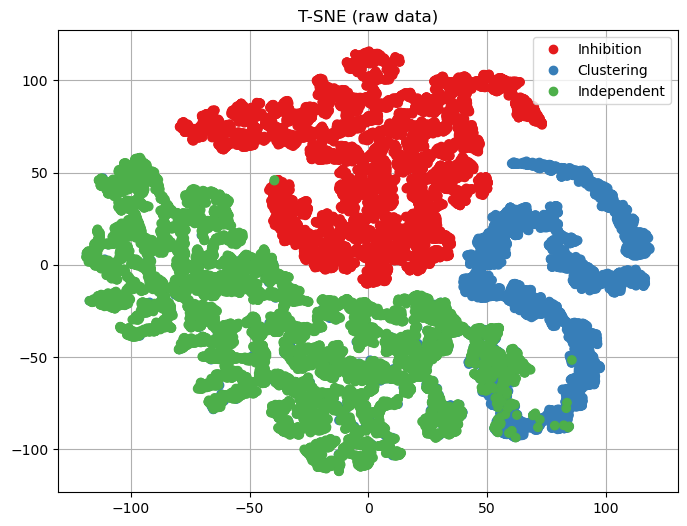

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax_scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="Set1", vmin=0, vmax=9, zorder=3)
ax.grid()
ax.legend(handles=ax_scatter.legend_elements()[0], labels=class_names)
ax.set(title="T-SNE (raw data)")
plt.savefig("figures/TSNE_raw_data.eps")
plt.savefig("figures/TSNE_raw_data.png")
plt.show()

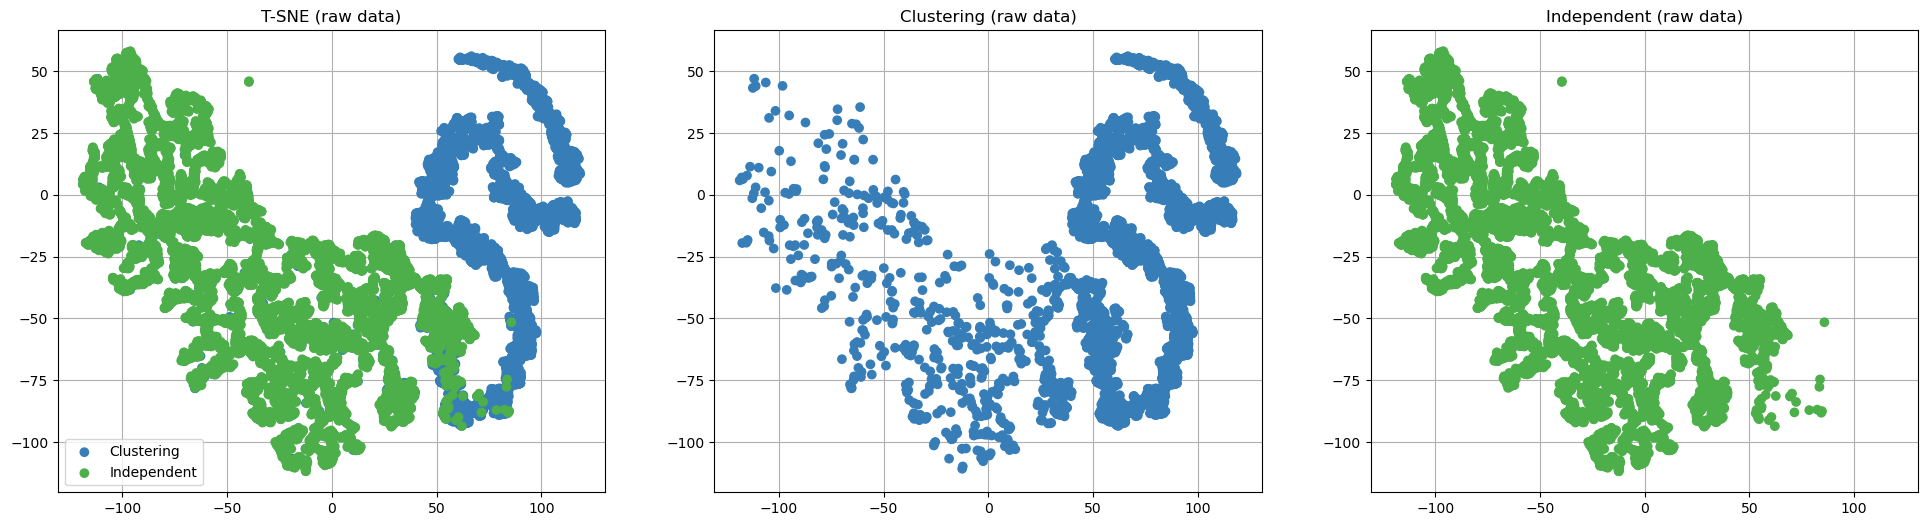

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(8*3, 6))
axes[0].scatter(X_tsne[y[:, 0] == 1, 0], X_tsne[y[:, 0] == 1, 1], c=y[y[:, 0] == 1], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Clustering")
axes[0].scatter(X_tsne[y[:, 0] == 2, 0], X_tsne[y[:, 0] == 2, 1], c=y[y[:, 0] == 2], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Independent")
axes[0].legend()
axes[0].grid()
axes[0].set(title="T-SNE (raw data)")
xlim = axes[0].get_xlim()
ylim = axes[0].get_ylim()

for i, ax in zip((1,2), axes[1:]):
    X_tsne_i = X_tsne[y[:,0]==i]
    ax_scatter = ax.scatter(X_tsne_i[:, 0], X_tsne_i[:, 1], c=np.full(X_tsne_i.shape[0], i), cmap="Set1", vmin=0, vmax=9, zorder=3)
    ax.set(title=class_names[i] + " (raw data)", xlim=xlim, ylim=ylim)
    ax.grid()
plt.show()

# Clustering (filter)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


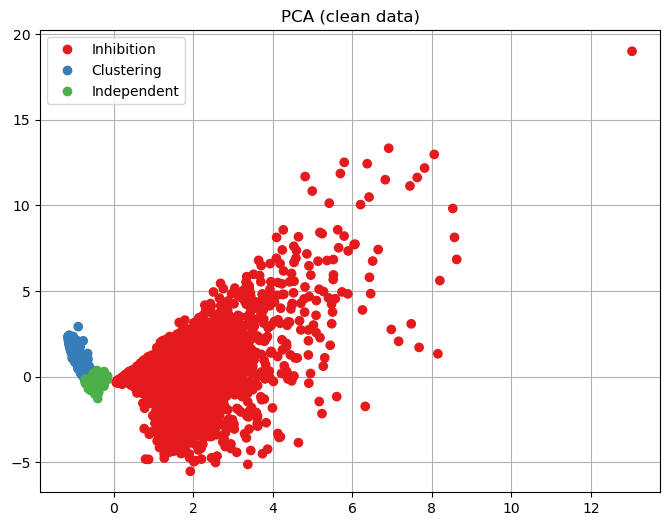

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
X_pca = pca_model.transform(X[filter_mask])
ax_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y[filter_mask], cmap="Set1", vmin=0, vmax=9, zorder=3)
ax.grid()
ax.set(title="PCA (clean data)")
ax.legend(handles=ax_scatter.legend_elements()[0], labels=class_names)
plt.savefig("figures/PCA_clean_data.eps")
plt.savefig("figures/PCA_clean_data.png")
plt.show()

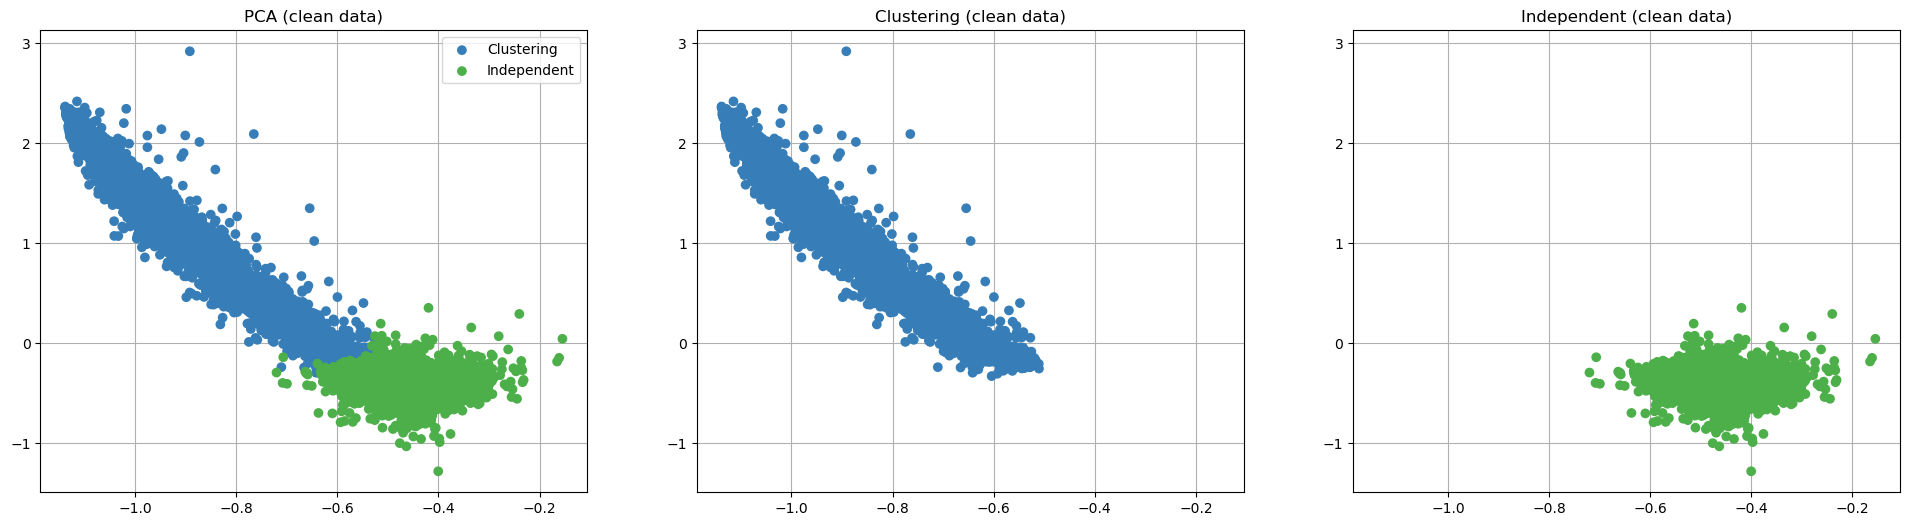

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(8*3, 6))
axes[0].scatter(X_pca[y[filter_mask][:, 0] == 1, 0], X_pca[y[filter_mask][:, 0] == 1, 1], c=y[filter_mask][y[filter_mask][:, 0] == 1], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Clustering")
axes[0].scatter(X_pca[y[filter_mask][:, 0] == 2, 0], X_pca[y[filter_mask][:, 0] == 2, 1], c=y[filter_mask][y[filter_mask][:, 0] == 2], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Independent")
axes[0].legend()
axes[0].grid()
axes[0].set(title="PCA (clean data)")
xlim = axes[0].get_xlim()
ylim = axes[0].get_ylim()

for i, ax in zip((1,2), axes[1:]):
    X_pca_i = X_pca[y[filter_mask][:,0]==i]
    ax_scatter = ax.scatter(X_pca_i[:, 0], X_pca_i[:, 1], c=np.full(X_pca_i.shape[0], i), cmap="Set1", vmin=0, vmax=9, zorder=3)
    ax.set(title=class_names[i] + " (clean data)", xlim=xlim, ylim=ylim)
    ax.grid()
plt.show()

In [11]:
tsne_model = TSNE(n_components=2)
X_tsne = tsne_model.fit_transform(X_pca)

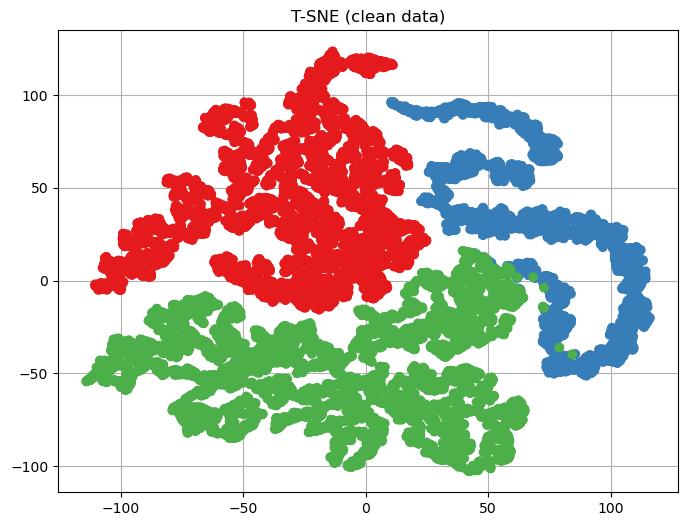

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[filter_mask], cmap="Set1", vmin=0, vmax=9, zorder=3)
ax.set(title="T-SNE (clean data)")
plt.grid()
plt.savefig("figures/TSNE_clean_data.eps")
plt.savefig("figures/TSNE_clean_data.png")
plt.show()

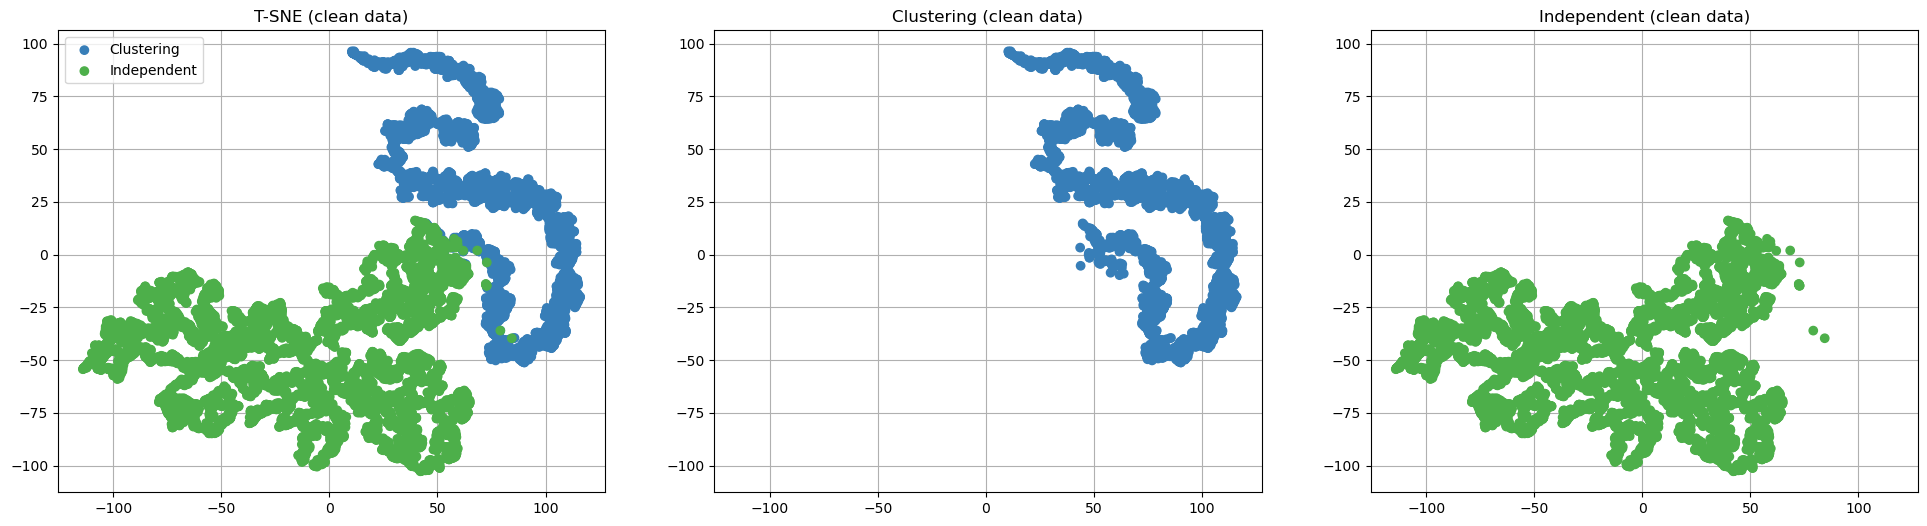

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(8*3, 6))
axes[0].scatter(X_tsne[y[filter_mask][:, 0] == 1, 0], X_tsne[y[filter_mask][:, 0] == 1, 1], c=y[filter_mask][y[filter_mask][:, 0] == 1], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Clustering")
axes[0].scatter(X_tsne[y[filter_mask][:, 0] == 2, 0], X_tsne[y[filter_mask][:, 0] == 2, 1], c=y[filter_mask][y[filter_mask][:, 0] == 2], cmap="Set1", vmin=0, vmax=9, zorder=3, label="Independent")
axes[0].legend()
axes[0].grid()
axes[0].set(title="T-SNE (clean data)")
xlim = axes[0].get_xlim()
ylim = axes[0].get_ylim()

for i, ax in zip((1,2), axes[1:]):
    X_tsne_i = X_tsne[y[filter_mask][:,0]==i]
    ax_scatter = ax.scatter(X_tsne_i[:, 0], X_tsne_i[:, 1], c=np.full(X_tsne_i.shape[0], i), cmap="Set1", vmin=0, vmax=9, zorder=3)
    ax.set(title=class_names[i] + " (clean data)", xlim=xlim, ylim=ylim)
    ax.grid()
plt.show()